In [ ]:
%qtconsole

['ds00', 'ds01', 'ds02', 'ds03', 'ds04', 'ds05', 'ds06', 'ds07'] ds00


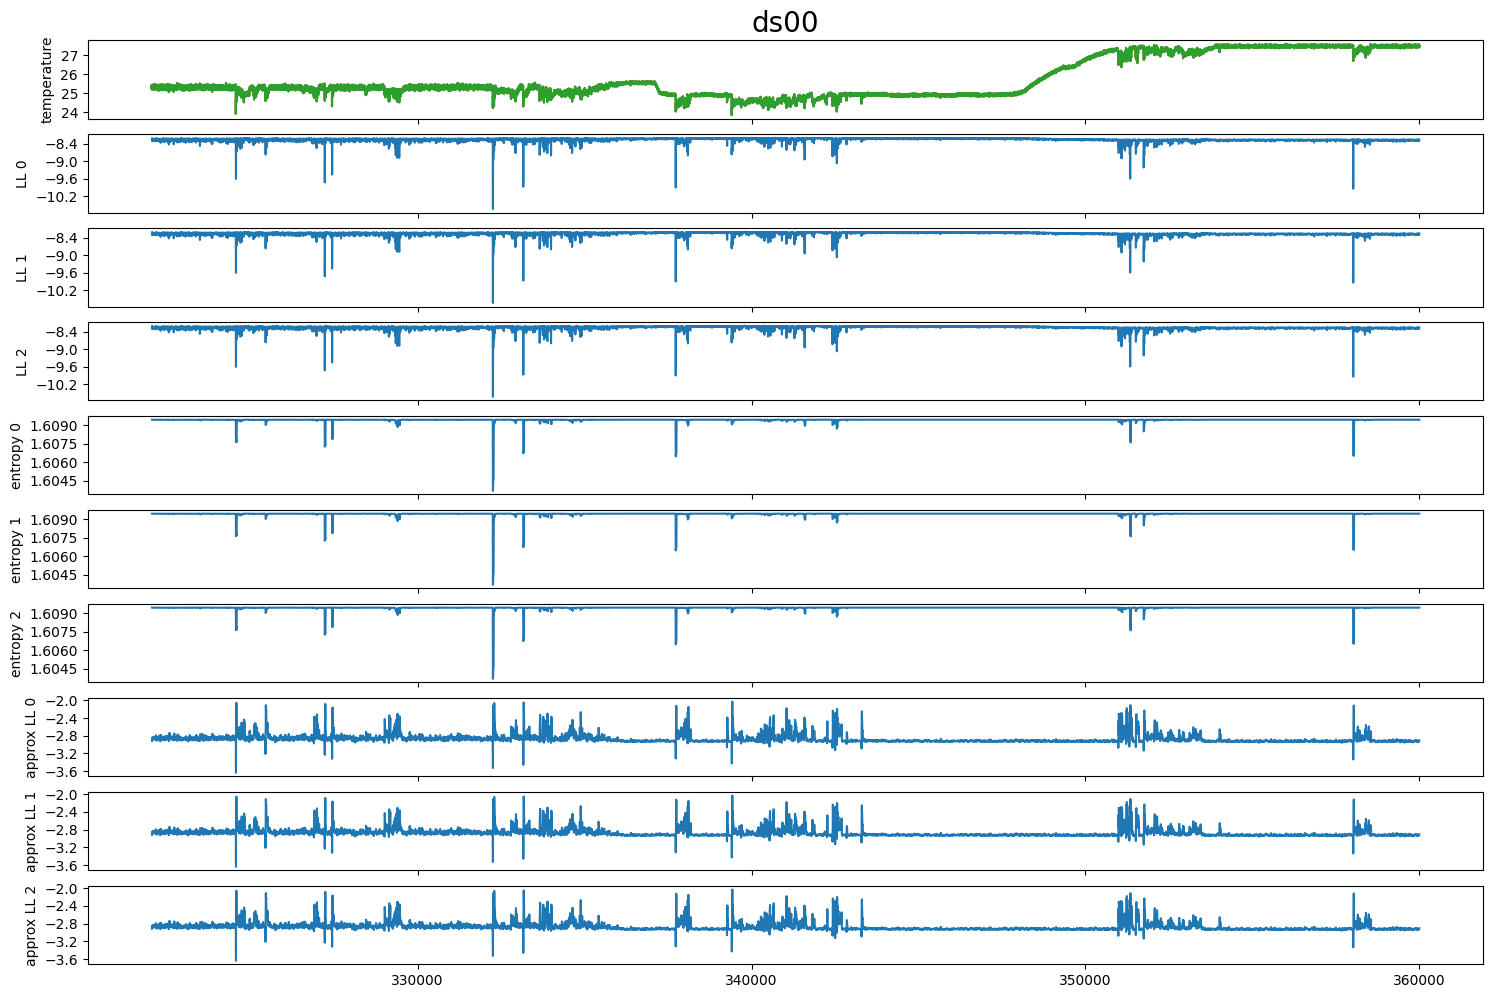

['ds00', 'ds01', 'ds02', 'ds03', 'ds04', 'ds05', 'ds06', 'ds07'] ds01


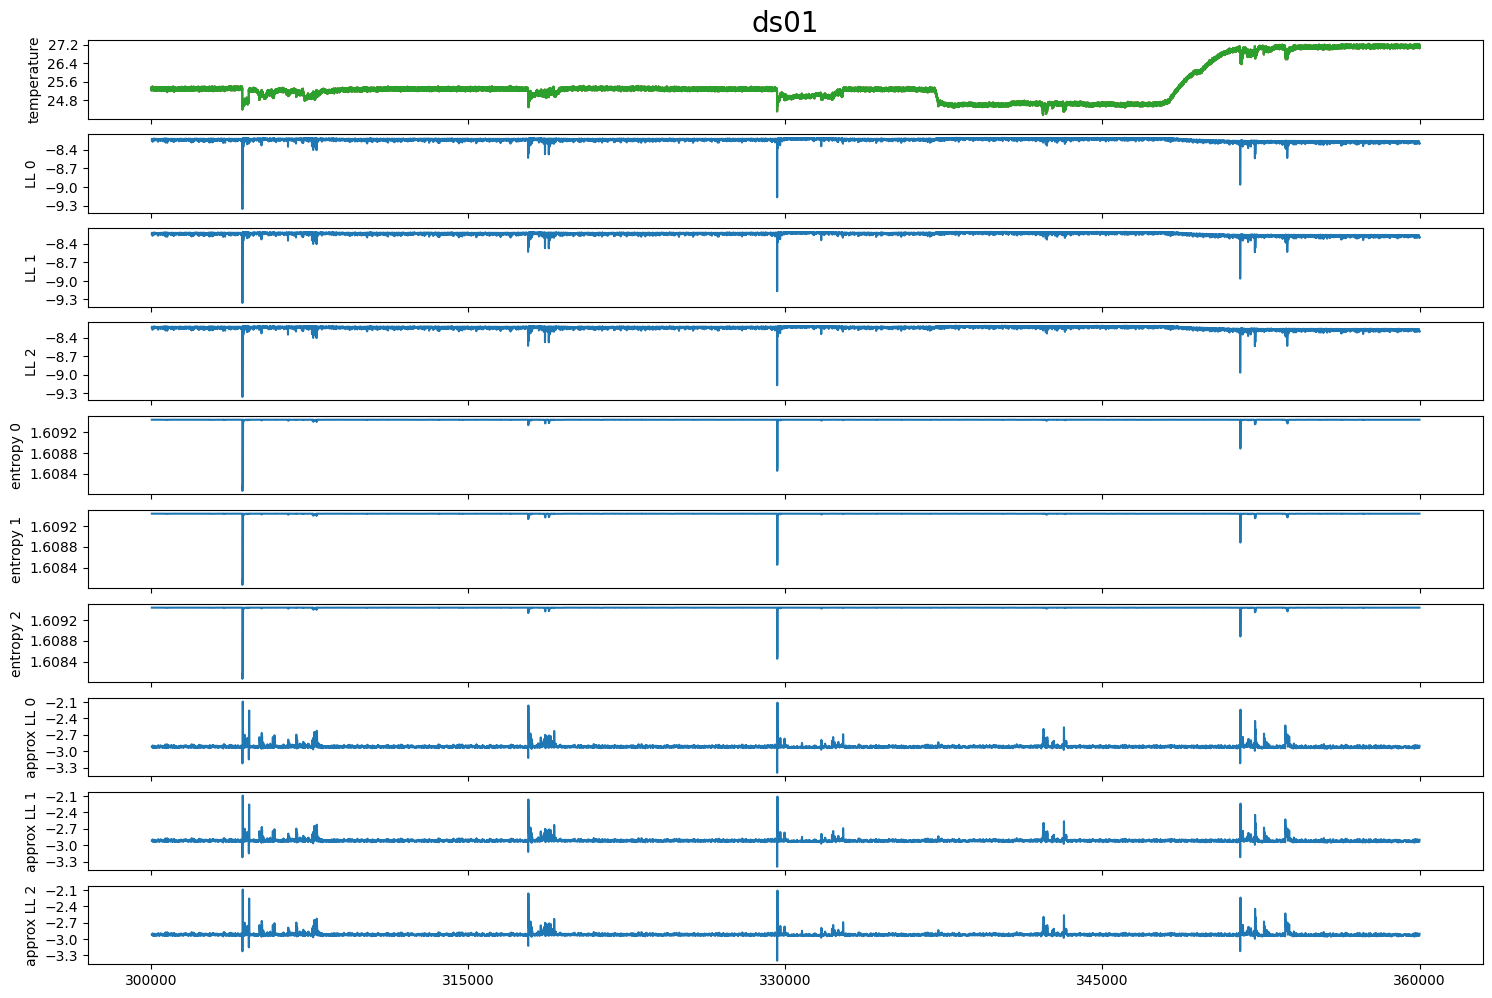

['ds00', 'ds01', 'ds02', 'ds03', 'ds04', 'ds05', 'ds06', 'ds07'] ds02


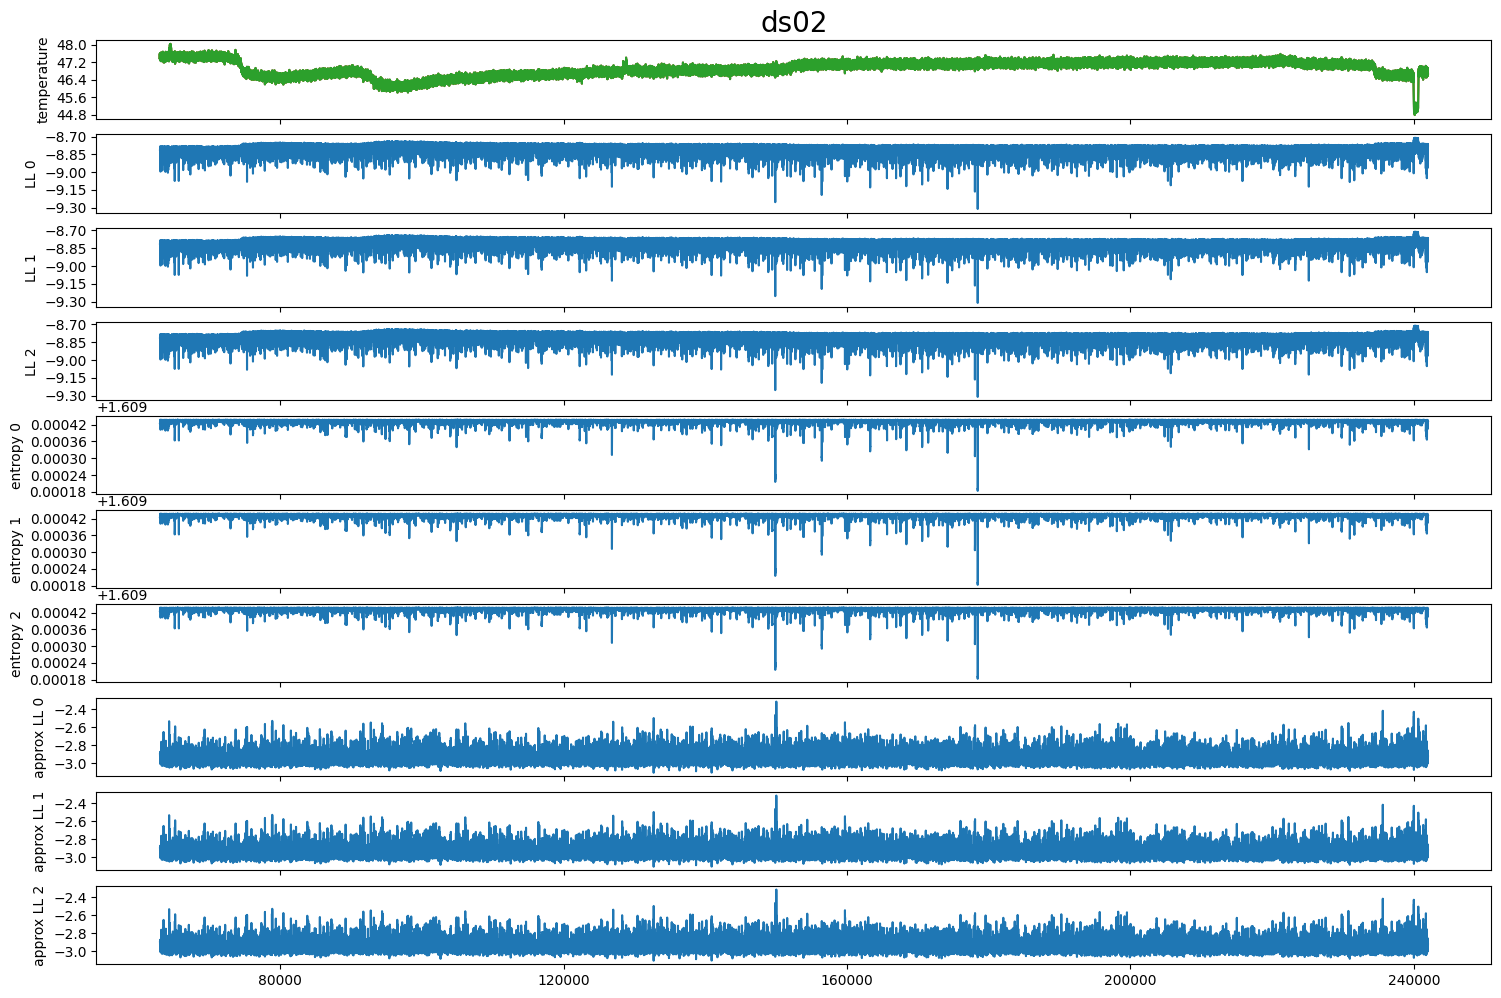

['ds00', 'ds01', 'ds02', 'ds03', 'ds04', 'ds05', 'ds06', 'ds07'] ds03


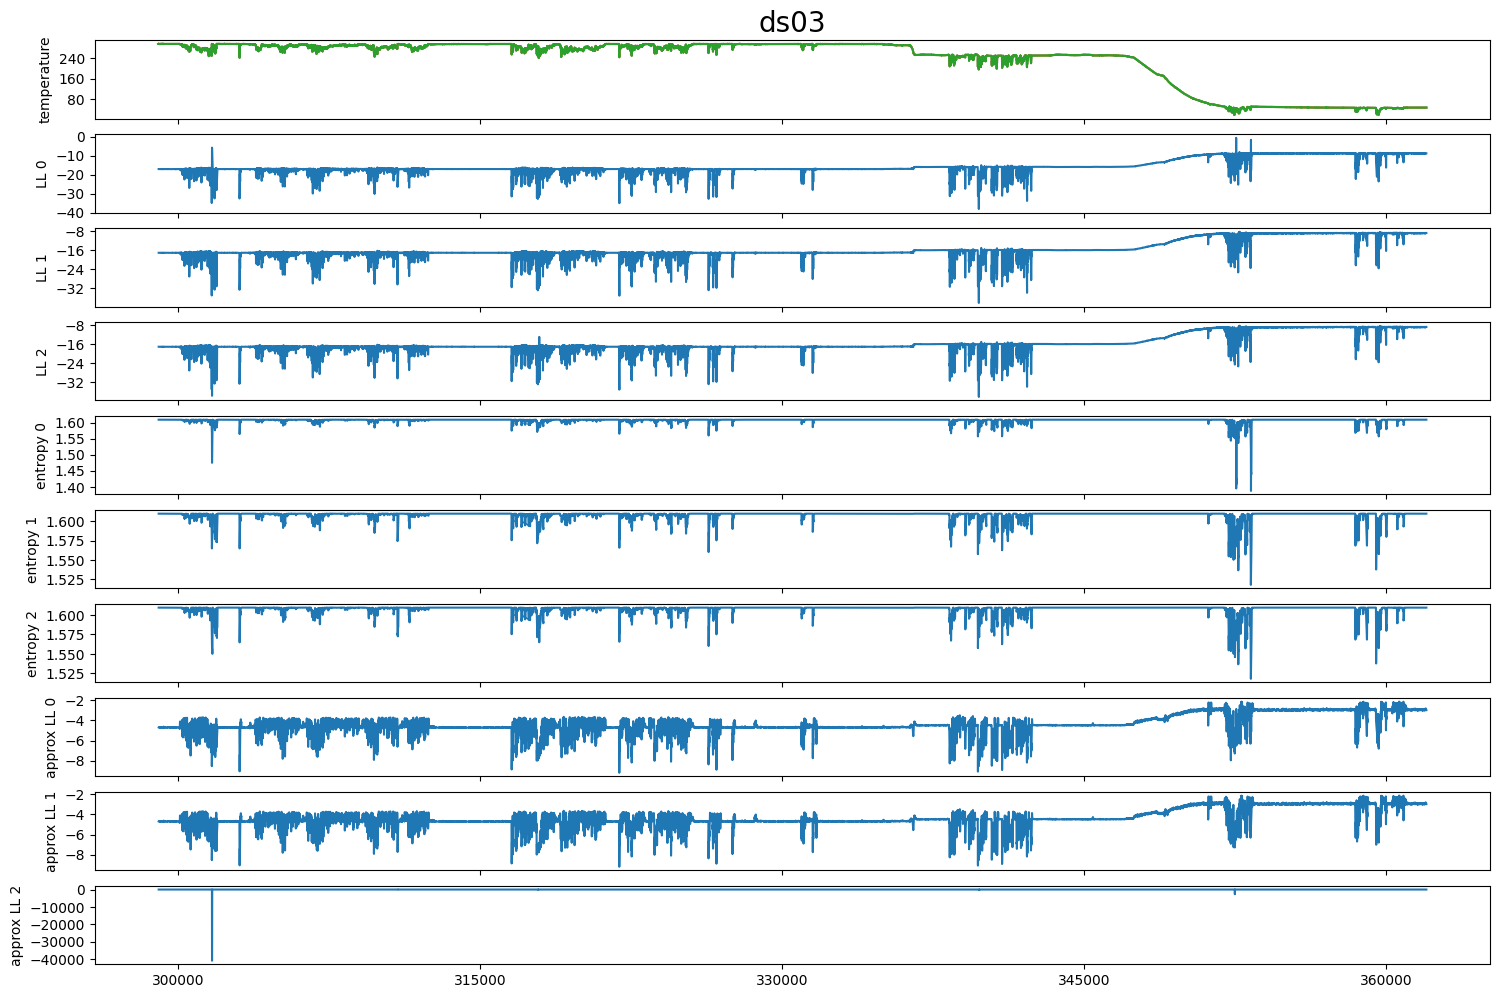

['ds00', 'ds01', 'ds02', 'ds03', 'ds04', 'ds05', 'ds06', 'ds07'] ds04


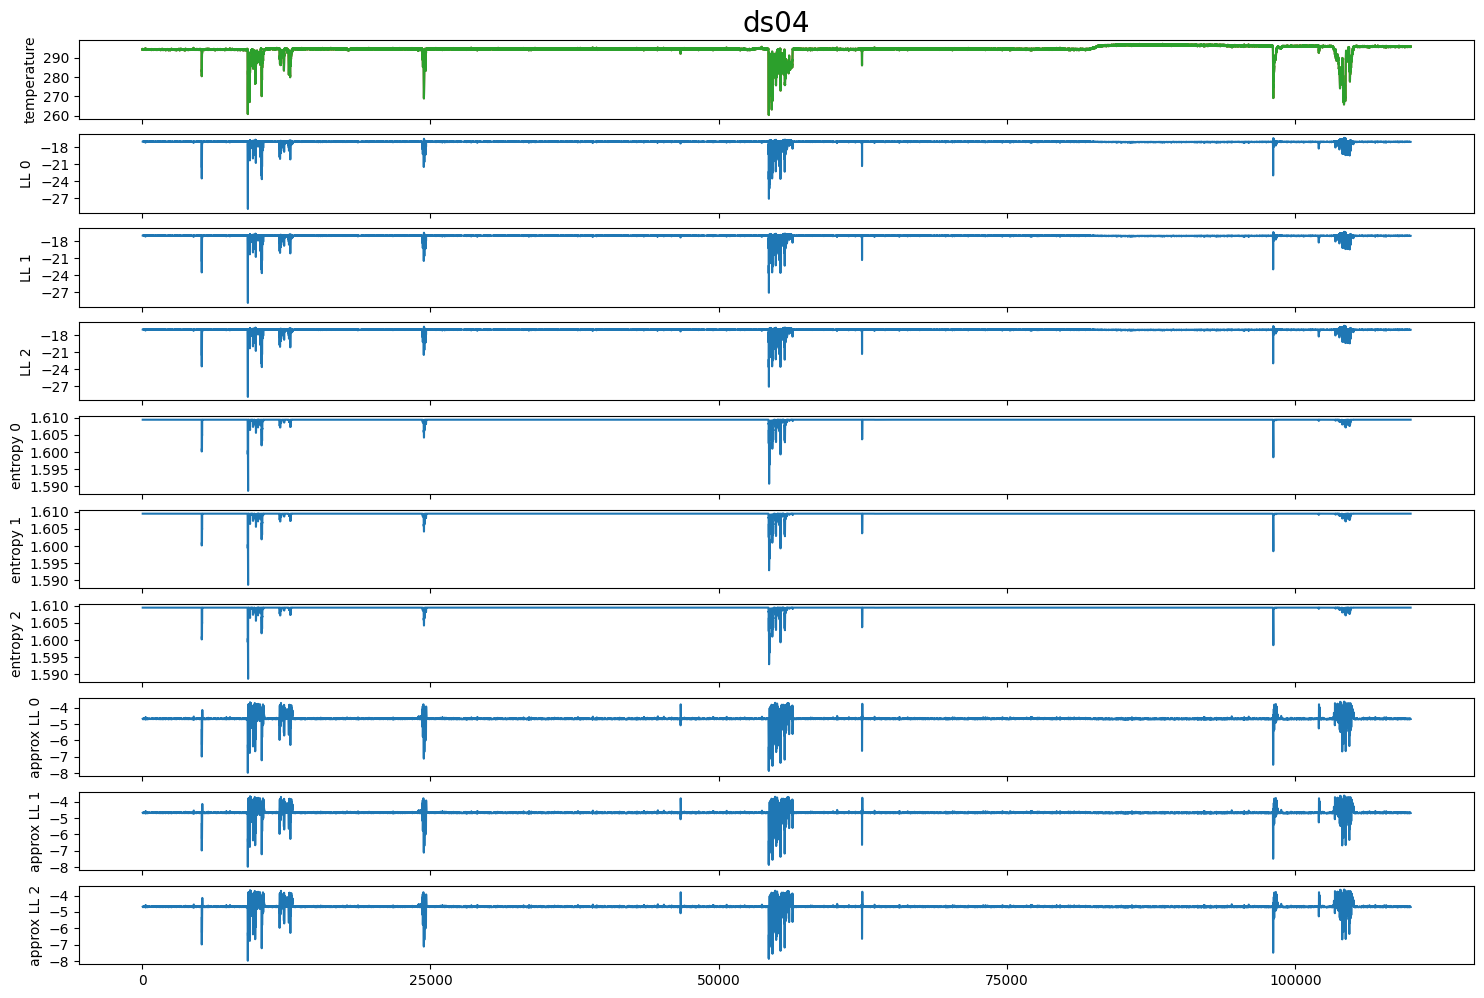

['ds00', 'ds01', 'ds02', 'ds03', 'ds04', 'ds05', 'ds06', 'ds07'] ds05


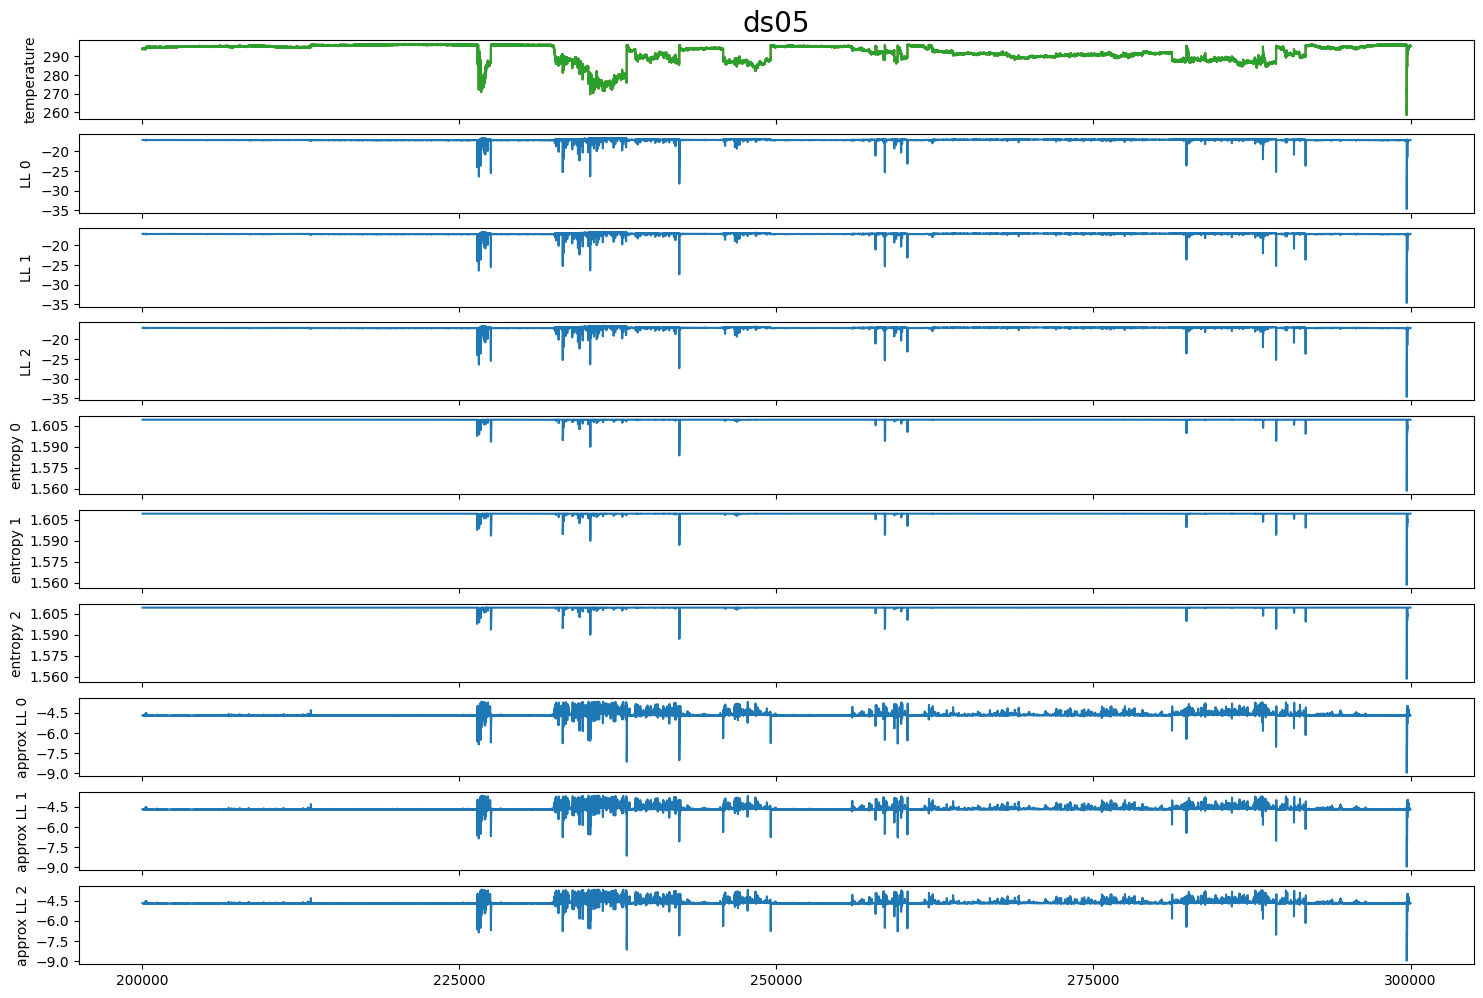

['ds00', 'ds01', 'ds02', 'ds03', 'ds04', 'ds05', 'ds06', 'ds07'] ds06


In [ ]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ds= [
        "ds00",
        "ds01",
        "ds02",
        "ds03",
        "ds04",
        "ds05",
        "ds06",
        "ds07"    
]
for i in ds:
    print(ds, i)
    data_dir = "../data/test_output/bs-5_wsib-5"
    
    g0 =    sorted(glob(data_dir + "/" + i +'.*alg-0*.csv'))
    g1 =    sorted(glob(data_dir + "/" + i +'.*alg-1*.csv'))
    g2 =    sorted(glob(data_dir + "/" + i +'.*alg-2*.csv'))

    df0 = pd.DataFrame()
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()

    for f in g0:
        df0 = df0.append(pd.read_csv(f))
    for f in g1:
        df1 = df1.append(pd.read_csv(f))
    for f in g2:
        df2 = df2.append(pd.read_csv(f))

    df0.set_index('x', inplace=True)   
    df1.set_index('x', inplace=True)   
    df2.set_index('x', inplace=True)   

    calc0 = df0.dropna()
    calc1 = df1.dropna()
    calc2 = df2.dropna()

    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, 1, sharex=True)
    fig.set_figheight(12)
    fig.set_figwidth(18)
    ax1.set_title(i, fontsize=20)
    ax1.plot(df0.index, df0['y'])
    ax1.plot(df1.index, df1['y'])
    ax1.plot(df1.index, df1['y'])
    ax1.set_ylabel('temperature')

    # share x only
    ax2.plot(calc0.index, calc0['LL'])
    ax2.set_ylabel('LL 0')

    ax3.plot(calc1.index, calc1['LL'])
    ax3.set_ylabel('LL 1')

    ax4.plot(calc2.index, calc2['LL'])
    ax4.set_ylabel('LL 2')

    
    ax5.plot(calc0.index, calc0['entropy'])
    ax5.set_ylabel('entropy 0')

    ax6.plot(calc1.index, calc1['entropy'])
    ax6.set_ylabel('entropy 1')

    ax7.plot(calc2.index, calc2['entropy'])
    ax7.set_ylabel('entropy 2')
    
    ax8.plot(calc0.index, calc0['approx_LL'])
    ax8.set_ylabel('approx LL 0')

    ax9.plot(calc1.index, calc1['approx_LL'])
    ax9.set_ylabel('approx LL 1')

    ax10.plot(calc2.index, calc2['approx_LL'])
    ax10.set_ylabel('approx LL 2')
    
#     ax5.plot(calc0.index, calc0['approx_LL'] - calc2['approx_LL'])
#     ax5.set_ylim([-0.001, 0.001])
#     ax5.set_ylabel('difference')

    plt.show()